[100 points] Write a program to find the coefficients for a linear regression model for the dataset provided (data2.txt). Assume a linear model: y = w0 + w1*x.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("data2.txt", header=None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       97 non-null     float64
 1   1       97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [4]:
df.columns = ['X', 'Y']
X = np.array(df[['X']])
Y = np.array(df[['Y']])

In [5]:
print(df)

          X         Y
0    6.1101  17.59200
1    5.5277   9.13020
2    8.5186  13.66200
3    7.0032  11.85400
4    5.8598   6.82330
..      ...       ...
92   5.8707   7.20290
93   5.3054   1.98690
94   8.2934   0.14454
95  13.3940   9.05510
96   5.4369   0.61705

[97 rows x 2 columns]


1)	Plot the data (i.e., x-axis for the 1st column, y-axis for the 2nd column), [10 pts]

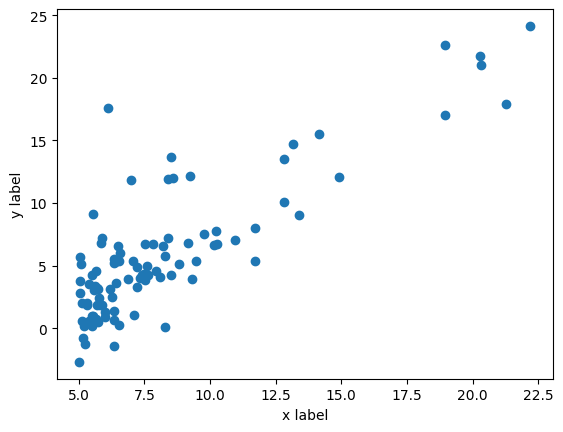

In [6]:
plt.scatter(X, Y)
plt.xlabel('x label')
plt.ylabel('y label')
plt.show()

and use Python to implement the following methods to find the coefficients:
2)	Normal equation [20 pts], and


In [7]:
bias = np.ones((97,1))
X_bias = np.concatenate((bias, X), axis = 1)

In [8]:
coef = np.dot(np.linalg.inv(np.dot(X_bias.transpose(), X_bias)), np.dot(X_bias.transpose(), Y))

In [9]:
print(coef)

[[-3.89578088]
 [ 1.19303364]]


**3)	Gradient Descent using batch AND stochastic modes respectively:**

a)	Split dataset into 80% for training and 20% for testing. [8 pts]


In [10]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
train_set, test_set = split_train_test(df, 0.2)

In [12]:
print(test_set)

          X         Y
56   6.2742   2.47560
71   7.3345   4.02590
1    5.5277   9.13020
90   5.7077   1.84510
92   5.8707   7.20290
94   8.2934   0.14454
12   5.7340   3.15510
19   7.0708   5.38930
54   6.3328   1.42330
67  10.2360   7.77540
7    8.5781  12.00000
9    5.0546   3.81660
2    8.5186  13.66200
78  10.2740   6.75260
36   8.0959   4.11640
22   5.4901   4.26300
11  14.1640  15.50500
14   5.6407   0.71618
96   5.4369   0.61705


b)	Plot MSE vs. iteration of the batch mode for both training set and testing set (in the same figure). (You need to determine an appropriate termination condition, e.g., when cost function is less than a threshold, and/or after a given number of iterations.) [17 pts]

In [13]:
len(train_set)

78

In [34]:
l = 0.01
X_train = np.array(train_set[['X']])
Y_train = np.array(train_set[['Y']])
bias = np.ones((78,1))
theta = np.random.randn(2,1)
X_train_bias = np.concatenate((bias, X_train), axis = 1)
mse_train = []

In [35]:
for i in range(1000):
    gradients = 2/78 * X_train_bias.T.dot(X_train_bias.dot(theta) - Y_train)
    theta = theta - l*gradients
    y_pred = X_train_bias.dot(theta)
    mse_func = np.mean((y_pred - Y_train)**2)
    mse_train.append(mse_func)

print('begining mse', mse_train[0])
print('ending mse', mse_train[-1])

begining mse 29.170016818677777
ending mse 8.375898167142273


In [36]:
len(test_set)

19

In [37]:
theta

array([[-3.98722664],
       [ 1.1883526 ]])

In [55]:
l = 0.01
X_test = np.array(test_set[['X']])
Y_test = np.array(test_set[['Y']])
bias_test = np.full((19, 1), theta[0])
X_test_bias = np.concatenate((bias_test, X_test), axis = 1)
mse_test = []

In [39]:
X_test_bias

array([[-3.98722664,  6.2742    ],
       [-3.98722664,  7.3345    ],
       [-3.98722664,  5.5277    ],
       [-3.98722664,  5.7077    ],
       [-3.98722664,  5.8707    ],
       [-3.98722664,  8.2934    ],
       [-3.98722664,  5.734     ],
       [-3.98722664,  7.0708    ],
       [-3.98722664,  6.3328    ],
       [-3.98722664, 10.236     ],
       [-3.98722664,  8.5781    ],
       [-3.98722664,  5.0546    ],
       [-3.98722664,  8.5186    ],
       [-3.98722664, 10.274     ],
       [-3.98722664,  8.0959    ],
       [-3.98722664,  5.4901    ],
       [-3.98722664, 14.164     ],
       [-3.98722664,  5.6407    ],
       [-3.98722664,  5.4369    ]])

In [56]:
for i in range(1000):
    gradients_test = 2/19 * X_test_bias.T.dot(X_test_bias.dot(theta) - Y_test)
    theta = theta - l*gradients_test
    y_pred = X_test_bias.dot(theta)
    mse_func = np.mean((y_pred - Y_test)**2)
    mse_test.append(mse_func)

print('begining mse', mse_test[0])
print('ending mse', mse_test[-1])

begining mse 15.44335396327519
ending mse 10.854781335217448


In [96]:
epochs = range(1,1001)

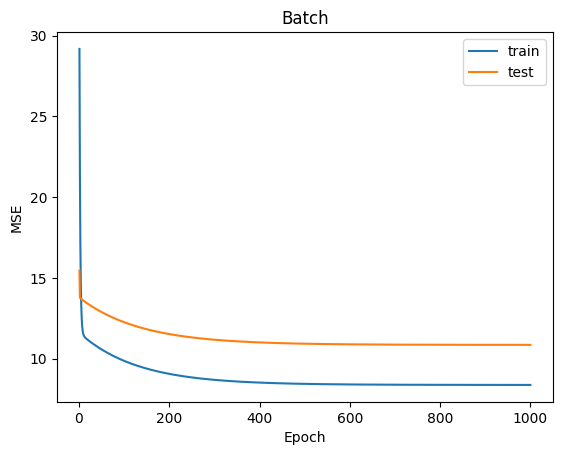

In [97]:
plt.plot(epochs, mse_train, label = "train")
plt.plot(epochs, mse_test, label = "test")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Batch")
plt.show()

c)	Repeat b) but using the stochastics mode. [17 pts]

In [79]:
l = 0.01
theta = np.random.randn(2,1)
mse_train_s = []

for i in range(10):
    random_index = np.random.randint(78)
    xi = X_train_bias[random_index:random_index+1]
    yi = Y_train[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    theta = theta - l*gradients
    y_pred = xi.dot(theta)
    mse_func = np.mean((y_pred - yi)**2)
    mse_train_s.append(mse_func)

print('begining mse', mse_train_s[0])
print('ending mse', mse_train_s[-1])

begining mse 0.2328323096043553
ending mse 0.02159823695893333


In [75]:
l = 0.01
mse_test_s = []

for i in range(10):
    random_index = np.random.randint(19)
    xi = X_test_bias[random_index:random_index+1]
    yi = Y_test[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    theta = theta - l*gradients
    y_pred = xi.dot(theta)
    mse_func = np.mean((y_pred - yi)**2)
    mse_test_s.append(mse_func)

print('begining mse', mse_test_s[0])
print('ending mse', mse_test_s[-1])

begining mse 25.681658638562343
ending mse 0.802147872910253


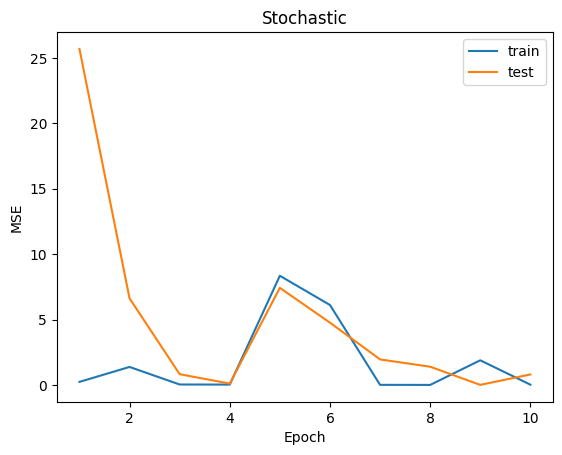

In [94]:
plt.clf()
epochs = range(1,11)
plt.plot(epochs, mse_train_s, label = "train")
plt.plot(epochs, mse_test_s, label = "test")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Stochastic")
plt.show()

d)	Compare batch and stochastic modes (with discussion) in terms of accuracy (of testing set) and speed of convergence. [8 pts]

**Accuracy of Testing Set**

Since this is primarily a regression task, for accuracy, we would look at the value of MSE for batch and stochastic modes on testing sets. MSE for Stochastic mode is much lower than the MSE of batch, that too with fewer number of epochs, proving that stochastic mode has better chances of finding the global minimum. That is because it bounces around the function as can be seen in the plots. If we ran batch mode with a higher learning rate, or for more epochs, we could reduce the mse further, but stochastic is already giving much less mse with fewer number of epochs. Stochastic mode was better in this instance, but this won't be the case all the time, because randomness employed by stochastic mode is good to escape local minima, but it also means that it wont settle at the global minima. As you can see from the plot, the global minimum would have been at 4th epoch, but it didnt settle there.

**Speed of Convergence**

Practically speaking, on the dataset that we have been given it is very difficult to judge the speed of convergence because it is too small, only 97 rows. At this small dataset, both modes have nearly equal speed of convergence. But it is to be noted that generally, the stochastic mode is much faster at convergence than the batch mode because it works with an instance of data rather than the complete dataset as in batch mode.

e)	Change learning rate and plot MSE of the testing set vs. learning rate (using 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01). Based on the plot, determine the best learning rate. [20 pts]

In [90]:
l = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
mse_test_l = []
theta = np.random.randn(2,1)

for i in l:
    gradients = 2/78 * X_train_bias.T.dot(X_train_bias.dot(theta) - Y_train)
    theta = theta - i*gradients
    y_pred = X_train_bias.dot(theta)
    mse_func = np.mean((y_pred - Y_train)**2)
    mse_test_l.append(mse_func)

print('begining mse', mse_test_l[0])
print('ending mse', mse_test_l[-1])

begining mse 238.48835967530255
ending mse 11.021761131645249


In [98]:
print(mse_test_l)

[238.48835967530255, 107.00850765108262, 32.674122024524245, 13.039786852513524, 11.134677691148733, 11.092723446318093, 11.077906240732634, 11.061148904023742, 11.042420741963396, 11.021761131645249]


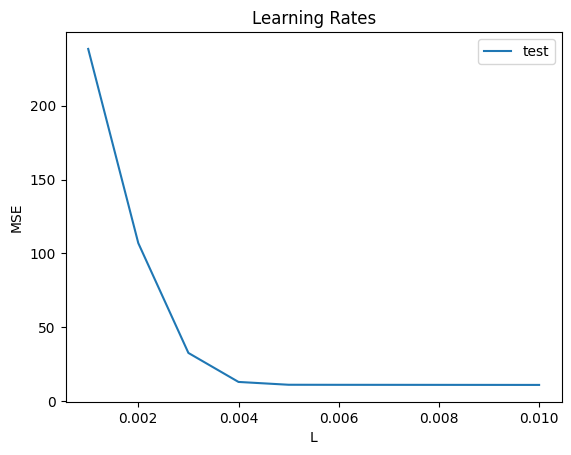

In [93]:
plt.clf()
plt.plot(l, mse_test_l, label = "test")
plt.legend()
plt.xlabel("L")
plt.ylabel("MSE")
plt.title("Learning Rates")
plt.show()

The plot shows that any learning rate after 0.004 works best because the MSE keeps on decreasing with increase in learning rate but very slowly. Among the given ones, the learning rate of 0.01 works best.